In [604]:
# Regression Model
#Preprocessing

In [605]:
import pandas as pd

In [606]:
data = pd.read_excel("/content/Copper_Set.xlsx")

In [607]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [608]:
data["product_ref"].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642])

In [609]:
# First we have select the columns.

In [610]:
data.drop(columns = ["id","item_date","customer","status","application","material_ref","delivery date"],inplace = True)

In [611]:
data.head()

,quantity tons,country,item type,thickness,width,product_ref,selling_price
0,54.151139,28.0,W,2.00,1500.0,1670798778,854.00
1,768.024839,25.0,W,0.80,1210.0,1668701718,1047.00
2,386.127949,30.0,WI,0.38,952.0,628377,644.33
3,202.411065,32.0,S,2.30,1317.0,1668701718,768.00
4,785.526262,28.0,W,4.00,2000.0,640665,577.00


In [612]:
#remove duplicates

In [613]:
data.drop_duplicates()

,quantity tons,country,item type,thickness,width,product_ref,selling_price
0,54.151139,28.0,W,2.00,1500.0,1670798778,854.00
1,768.024839,25.0,W,0.80,1210.0,1668701718,1047.00
2,386.127949,30.0,WI,0.38,952.0,628377,644.33
3,202.411065,32.0,S,2.30,1317.0,1668701718,768.00
4,785.526262,28.0,W,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...
181668,102.482422,25.0,W,0.96,1220.0,164141591,591.00
181669,208.086469,25.0,W,0.95,1500.0,164141591,589.00
181670,4.235594,25.0,W,0.71,1250.0,164141591,619.00
181671,-2000,25.0,W,0.85,1250.0,164141591,601.00


In [614]:
data.columns

Index(['quantity tons', 'country', 'item type', 'thickness', 'width',
       'product_ref', 'selling_price'],
      dtype='object')

In [615]:
data.isna().sum()

quantity tons     0
country          28
item type         0
thickness         1
width             0
product_ref       0
selling_price     1
dtype: int64

In [616]:
#we have small number of nan values,insread of taking the average, we can drop it.

In [617]:
data.dropna(subset = "thickness", inplace = True)
data.dropna(subset = "selling_price", inplace = True)
data.dropna(subset = "country", inplace = True)

In [618]:
data.isna().sum()

quantity tons    0
country          0
item type        0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [619]:
data.isnull().sum()

quantity tons    0
country          0
item type        0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [620]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181643 entries, 0 to 181672
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181643 non-null  object 
 1   country        181643 non-null  float64
 2   item type      181643 non-null  object 
 3   thickness      181643 non-null  float64
 4   width          181643 non-null  float64
 5   product_ref    181643 non-null  int64  
 6   selling_price  181643 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 11.1+ MB


In [621]:
#we have to check the values of zero,if value zero is corect we should leave as it is ,if it is not correct we have to drop it

In [622]:
columns = ["quantity tons","item type","country","thickness","width","product_ref","selling_price"]
for i in columns:
  zero = data[data[i] == 0]

In [623]:
zero

,quantity tons,country,item type,thickness,width,product_ref,selling_price
41,59.907355,25.0,W,2500.0,1260.0,1670798778,0.0
45358,37.655706,26.0,W,2.0,1300.0,1670798778,0.0


In [624]:

columns = ["quantity tons","item type","thickness","width","product_ref","selling_price"]
for i in columns:
  data.drop(data[data[i] == 0].index , inplace = True)

In [625]:
columns = ["quantity tons","item type","thickness","width","product_ref","selling_price"]
for i in columns:
  zero = data[data[i] == 0]

In [626]:
zero

,quantity tons,country,item type,thickness,width,product_ref,selling_price


In [627]:
# the quantity tons are in object we have to check their are any letter in the rows because the quantity tones should be in int or float.

In [628]:
data[data["quantity tons"].astype(str).str.isalpha()]

,quantity tons,country,item type,thickness,width,product_ref,selling_price
173086,e,78.0,W,0.5,1000.0,164141591,672.0


In [629]:
data.drop(data[data["quantity tons"].astype(str).str.isalpha()].index,axis = 0, inplace = True)

In [630]:
data[data["quantity tons"].astype(str).str.isalpha()]

,quantity tons,country,item type,thickness,width,product_ref,selling_price


In [631]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181640 entries, 0 to 181672
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181640 non-null  object 
 1   country        181640 non-null  float64
 2   item type      181640 non-null  object 
 3   thickness      181640 non-null  float64
 4   width          181640 non-null  float64
 5   product_ref    181640 non-null  int64  
 6   selling_price  181640 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 11.1+ MB


In [632]:
# again it showing qbject data type in quantity tons
#now we can understand that quantity tons columns as converted into object
# for that we have to convert object into int or float

In [633]:
data["quantity tons"].dtype

dtype('O')

In [634]:
#data["quantity tons"] = pd.to_numeric(data["quantity tons"], errors = "coerce")
data["quantity tons"] = data["quantity tons"].astype(float)

In [635]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181640 entries, 0 to 181672
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181640 non-null  float64
 1   country        181640 non-null  float64
 2   item type      181640 non-null  object 
 3   thickness      181640 non-null  float64
 4   width          181640 non-null  float64
 5   product_ref    181640 non-null  int64  
 6   selling_price  181640 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 11.1+ MB


In [636]:
data

,quantity tons,country,item type,thickness,width,product_ref,selling_price
0,54.151139,28.0,W,2.00,1500.0,1670798778,854.00
1,768.024839,25.0,W,0.80,1210.0,1668701718,1047.00
2,386.127949,30.0,WI,0.38,952.0,628377,644.33
3,202.411065,32.0,S,2.30,1317.0,1668701718,768.00
4,785.526262,28.0,W,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...
181668,102.482422,25.0,W,0.96,1220.0,164141591,591.00
181669,208.086469,25.0,W,0.95,1500.0,164141591,589.00
181670,4.235594,25.0,W,0.71,1250.0,164141591,619.00
181671,-2000.000000,25.0,W,0.85,1250.0,164141591,601.00


In [637]:
data.corr()

<ipython-input-637-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,quantity tons,country,thickness,width,product_ref,selling_price
quantity tons,1.000000,-0.001530,-0.001402,-0.000428,-0.001086,-0.000010
country,-0.001530,1.000000,-0.039465,0.055309,-0.147367,0.002993
thickness,-0.001402,-0.039465,1.000000,0.357565,0.076550,-0.002467
width,-0.000428,0.055309,0.357565,1.000000,-0.034400,0.000584
product_ref,-0.001086,-0.147367,0.076550,-0.034400,1.000000,0.002117
selling_price,-0.000010,0.002993,-0.002467,0.000584,0.002117,1.000000


In [638]:
data.columns

Index(['quantity tons', 'country', 'item type', 'thickness', 'width',
       'product_ref', 'selling_price'],
      dtype='object')

<ipython-input-639-b5a690243661>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["width"])


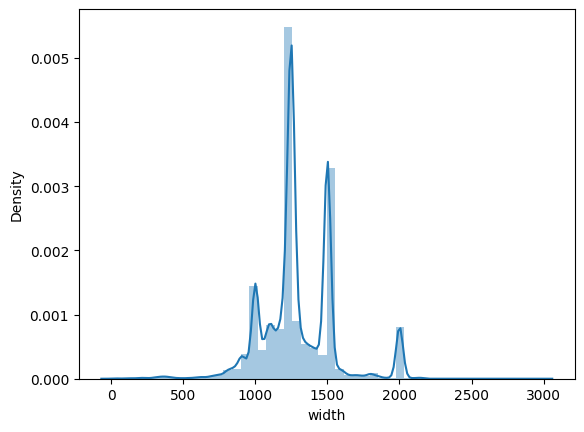

<ipython-input-639-b5a690243661>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["thickness"])


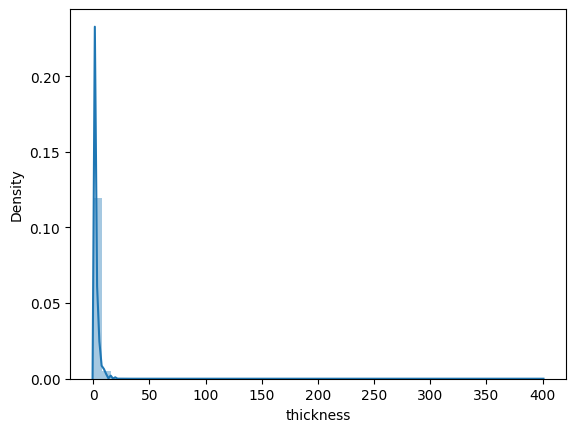

<ipython-input-639-b5a690243661>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["country"])


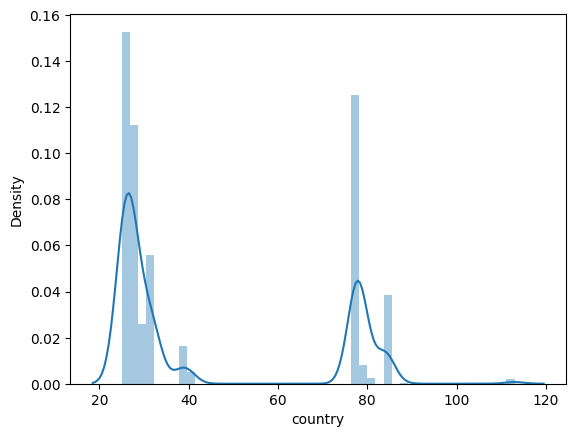

<ipython-input-639-b5a690243661>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["quantity tons"])


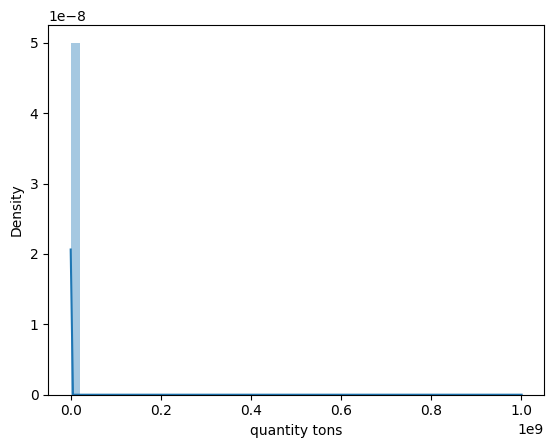

<ipython-input-639-b5a690243661>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["selling_price"])


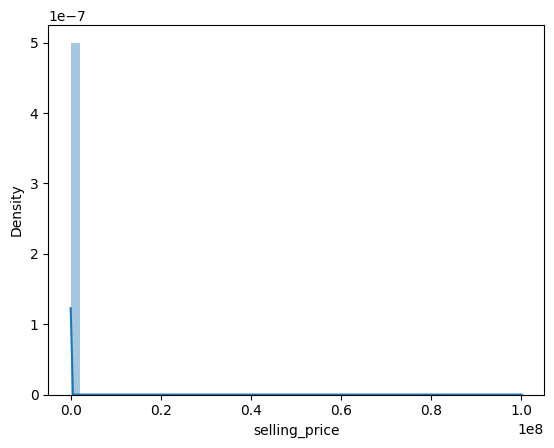

<ipython-input-639-b5a690243661>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["product_ref"])


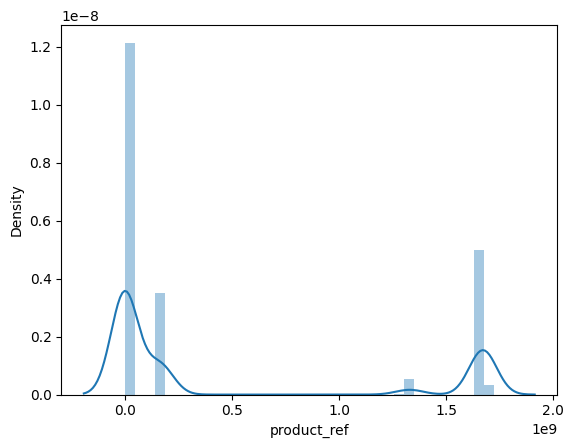

In [639]:
# now we have check the skewness in the data
# to know the skewness we have to plot
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
sns.distplot(data["width"])
plt.show()
sns.distplot(data["thickness"])
plt.show()
sns.distplot(data["country"])
plt.show()
sns.distplot(data["quantity tons"])
plt.show()
sns.distplot(data["selling_price"])
plt.show()
sns.distplot(data["product_ref"])
plt.show()

In [640]:
#  now we have to check the outliers

<Axes: >

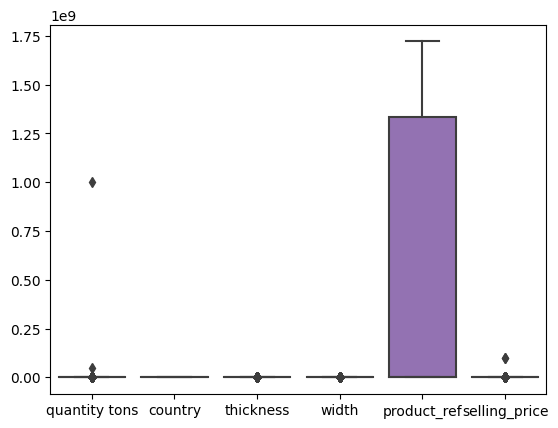

In [641]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data = data)

In [642]:
# we have to check one by one

<Axes: >

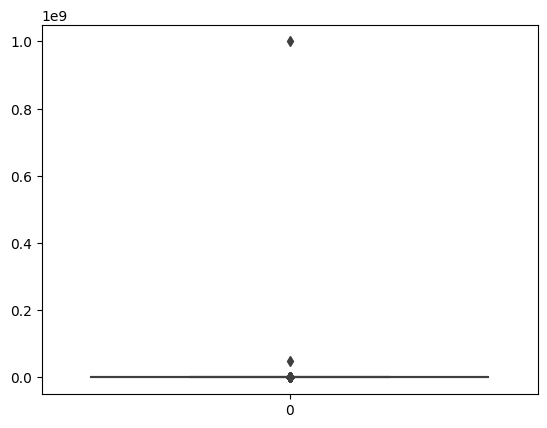

In [643]:
sns.boxplot(data["quantity tons"])

<Axes: >

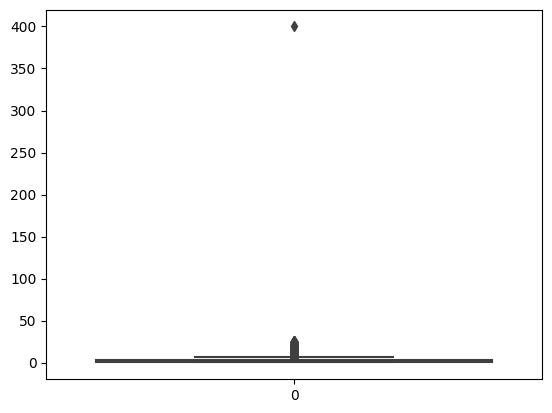

In [644]:
sns.boxplot(data["thickness"])

<Axes: >

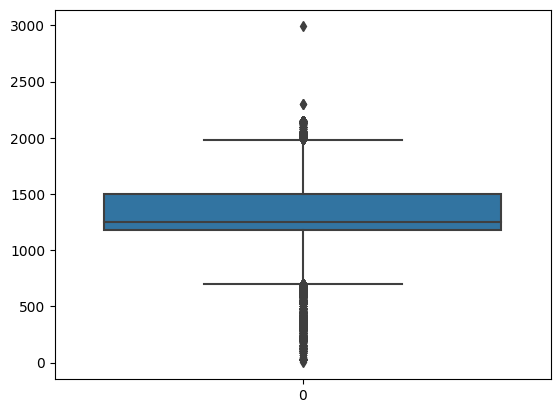

In [645]:
sns.boxplot(data["width"])

<Axes: >

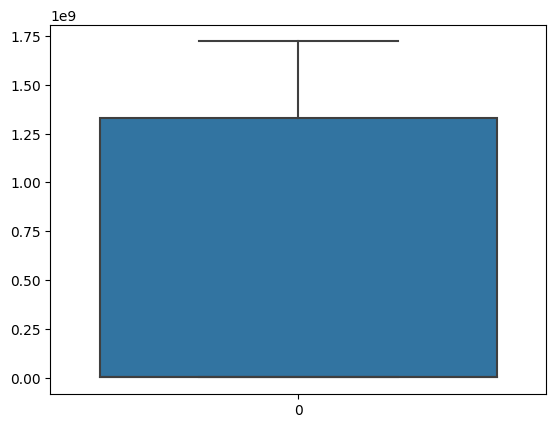

In [646]:
sns.boxplot(data["product_ref"])

In [647]:
# I am training the model without removing or treating the outliers

In [648]:
# Before training the model we have check the data weather train data are in int or not ,if theiris in object means we have to scale it

In [649]:
data.columns

Index(['quantity tons', 'country', 'item type', 'thickness', 'width',
       'product_ref', 'selling_price'],
      dtype='object')

In [650]:
data["item type"].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [651]:
data.head(2)

,quantity tons,country,item type,thickness,width,product_ref,selling_price
0,54.151139,28.0,W,2.0,1500.0,1670798778,854.0
1,768.024839,25.0,W,0.8,1210.0,1668701718,1047.0


In [652]:
data

,quantity tons,country,item type,thickness,width,product_ref,selling_price
0,54.151139,28.0,W,2.00,1500.0,1670798778,854.00
1,768.024839,25.0,W,0.80,1210.0,1668701718,1047.00
2,386.127949,30.0,WI,0.38,952.0,628377,644.33
3,202.411065,32.0,S,2.30,1317.0,1668701718,768.00
4,785.526262,28.0,W,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...
181668,102.482422,25.0,W,0.96,1220.0,164141591,591.00
181669,208.086469,25.0,W,0.95,1500.0,164141591,589.00
181670,4.235594,25.0,W,0.71,1250.0,164141591,619.00
181671,-2000.000000,25.0,W,0.85,1250.0,164141591,601.00


In [653]:
data[data['quantity tons'] <= 0]

,quantity tons,country,item type,thickness,width,product_ref,selling_price
105730,-4.000000,27.0,S,1.50,1500.0,1332077137,723.0
131473,-1.476794,27.0,S,0.60,1220.0,611993,22.0
181661,-18.000000,25.0,W,0.84,1220.0,164141591,590.0
181671,-2000.000000,25.0,W,0.85,1250.0,164141591,601.0


In [654]:
data[data['thickness'] <= 0]

,quantity tons,country,item type,thickness,width,product_ref,selling_price


In [655]:
data[data['width'] <= 0]

,quantity tons,country,item type,thickness,width,product_ref,selling_price


In [656]:
data[data['selling_price'] <= 0]

,quantity tons,country,item type,thickness,width,product_ref,selling_price
28,99.059199,30.0,W,0.595,1207.0,611993,-1160.0
44761,101.397995,32.0,W,1.250,1100.0,1721130331,-730.0
44810,12.225889,78.0,W,0.750,1250.0,164141591,-445.0
44865,28.368563,27.0,PL,1.500,1270.0,164141591,-25.0
105189,5.280274,25.0,W,6.000,1250.0,1671863738,-336.0


In [657]:
data[data['country'] <= 0]

,quantity tons,country,item type,thickness,width,product_ref,selling_price


In [658]:
data[data['product_ref'] <= 0]

,quantity tons,country,item type,thickness,width,product_ref,selling_price


In [659]:
skew = data['quantity tons'] <= 0
print(skew)

0         False
1         False
2         False
3         False
4         False
          ...  
181668    False
181669    False
181670    False
181671     True
181672    False
Name: quantity tons, Length: 181640, dtype: bool


In [660]:
skew = data['quantity tons'] <= 0
print(skew.sum())
# data.loc[skew, 'quantity tons'] = np.nan
skew
skew = data['thickness'] <= 0
print(skew.sum())

skew = data['selling_price'] <= 0
print(skew.sum())

4
0
5


In [661]:
data.drop(data[data['quantity tons'] <= 0].index,axis = 0, inplace = True)

In [662]:
data.drop(data[data['selling_price'] <= 0].index,axis = 0, inplace = True)

In [663]:
skew = data['quantity tons'] <= 0
print(skew.sum())
# data.loc[skew, 'quantity tons'] = np.nan
skew
skew = data['thickness'] <= 0
print(skew.sum())

skew = data['selling_price'] <= 0
print(skew.sum())

0
0
0


In [664]:
data

,quantity tons,country,item type,thickness,width,product_ref,selling_price
0,54.151139,28.0,W,2.00,1500.0,1670798778,854.00
1,768.024839,25.0,W,0.80,1210.0,1668701718,1047.00
2,386.127949,30.0,WI,0.38,952.0,628377,644.33
3,202.411065,32.0,S,2.30,1317.0,1668701718,768.00
4,785.526262,28.0,W,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...
181667,106.783299,25.0,W,0.96,1240.0,164141591,602.00
181668,102.482422,25.0,W,0.96,1220.0,164141591,591.00
181669,208.086469,25.0,W,0.95,1500.0,164141591,589.00
181670,4.235594,25.0,W,0.71,1250.0,164141591,619.00


In [665]:
data.dropna(inplace = True)

In [666]:
# taking log to distribute
import numpy as np
data["quantity tons"] = np.log(data["quantity tons"])
data["thickness"] = np.log(data["thickness"])
# data["width"] = np.log(data["width"])
# data["item type"] = np.log(data["item type"])
# data["product_ref"] = np.log(data["product_ref"])
data["selling_price"] = np.log(data["selling_price"])

In [667]:
data

,quantity tons,country,item type,thickness,width,product_ref,selling_price
0,3.991779,28.0,W,0.693147,1500.0,1670798778,6.749931
1,6.643822,25.0,W,-0.223144,1210.0,1668701718,6.953684
2,5.956169,30.0,WI,-0.967584,952.0,628377,6.468211
3,5.310301,32.0,S,0.832909,1317.0,1668701718,6.643790
4,6.666354,28.0,W,1.386294,2000.0,640665,6.357842
...,...,...,...,...,...,...,...
181667,4.670802,25.0,W,-0.040822,1240.0,164141591,6.400257
181668,4.629691,25.0,W,-0.040822,1220.0,164141591,6.381816
181669,5.337954,25.0,W,-0.051293,1500.0,164141591,6.378426
181670,1.443523,25.0,W,-0.342490,1250.0,164141591,6.428105


<ipython-input-668-3e55a6b2206a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["quantity tons"])


<Axes: xlabel='quantity tons', ylabel='Density'>

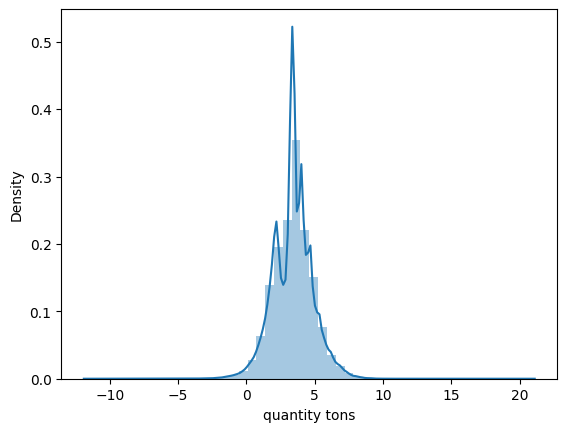

In [668]:
sns.distplot(data["quantity tons"])

<ipython-input-669-f3c56218fbba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["selling_price"])


<Axes: xlabel='selling_price', ylabel='Density'>

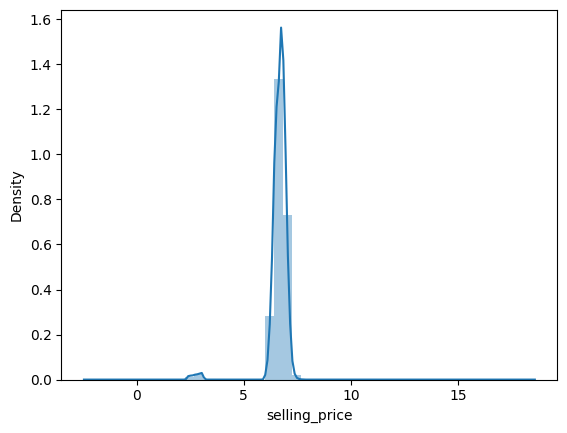

In [669]:
sns.distplot(data["selling_price"])

In [670]:
columns = ["quantity tons","country", "thickness", "width", "product_ref"]

<Axes: >

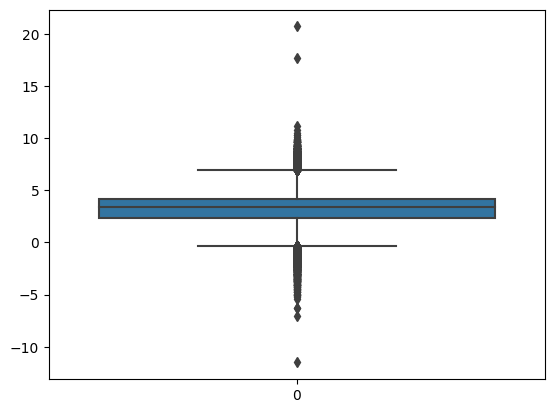

In [671]:
sns.boxplot(data["quantity tons"])

In [672]:
def remove_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data

In [673]:
# data = remove_outliers(data, columns)

In [674]:
data

,quantity tons,country,item type,thickness,width,product_ref,selling_price
0,3.991779,28.0,W,0.693147,1500.0,1670798778,6.749931
1,6.643822,25.0,W,-0.223144,1210.0,1668701718,6.953684
2,5.956169,30.0,WI,-0.967584,952.0,628377,6.468211
3,5.310301,32.0,S,0.832909,1317.0,1668701718,6.643790
4,6.666354,28.0,W,1.386294,2000.0,640665,6.357842
...,...,...,...,...,...,...,...
181667,4.670802,25.0,W,-0.040822,1240.0,164141591,6.400257
181668,4.629691,25.0,W,-0.040822,1220.0,164141591,6.381816
181669,5.337954,25.0,W,-0.051293,1500.0,164141591,6.378426
181670,1.443523,25.0,W,-0.342490,1250.0,164141591,6.428105


In [675]:
data.drop_duplicates()

,quantity tons,country,item type,thickness,width,product_ref,selling_price
0,3.991779,28.0,W,0.693147,1500.0,1670798778,6.749931
1,6.643822,25.0,W,-0.223144,1210.0,1668701718,6.953684
2,5.956169,30.0,WI,-0.967584,952.0,628377,6.468211
3,5.310301,32.0,S,0.832909,1317.0,1668701718,6.643790
4,6.666354,28.0,W,1.386294,2000.0,640665,6.357842
...,...,...,...,...,...,...,...
181667,4.670802,25.0,W,-0.040822,1240.0,164141591,6.400257
181668,4.629691,25.0,W,-0.040822,1220.0,164141591,6.381816
181669,5.337954,25.0,W,-0.051293,1500.0,164141591,6.378426
181670,1.443523,25.0,W,-0.342490,1250.0,164141591,6.428105


<Axes: >

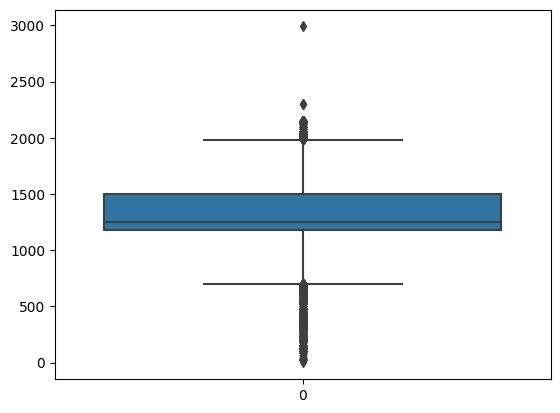

In [676]:
import seaborn as sns
sns.boxplot(data["width"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a30c3a4f700>,
 'caps': [<matplotlib.lines.Line2D at 0x7a30c3a64e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a30c3a4f460>],
 'medians': [<matplotlib.lines.Line2D at 0x7a30c3a4fbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a30c3a4fe80>],
 'means': []}

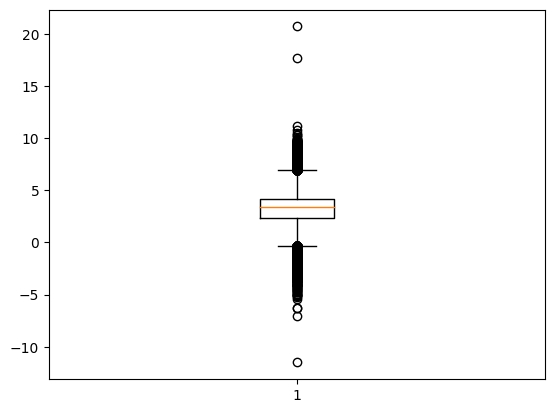

In [677]:
import matplotlib.pyplot as plt
plt.boxplot(data["quantity tons"])

In [678]:
# data.to_csv("F_Copper.csv",index = False )

In [679]:
data.isna().sum()

quantity tons    0
country          0
item type        0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [680]:
data.dropna(subset = ["selling_price"],inplace = True)

In [681]:
data.isna().sum()

quantity tons    0
country          0
item type        0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [682]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [683]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['item type'] = label_encoder.fit_transform(data['item type'])

In [684]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['product_ref'] = label_encoder.fit_transform(data['product_ref'])

In [685]:
data

,quantity tons,country,item type,thickness,width,product_ref,selling_price
0,3.991779,28.0,5,0.693147,1500.0,24,6.749931
1,6.643822,25.0,5,-0.223144,1210.0,22,6.953684
2,5.956169,30.0,6,-0.967584,952.0,5,6.468211
3,5.310301,32.0,3,0.832909,1317.0,22,6.643790
4,6.666354,28.0,5,1.386294,2000.0,8,6.357842
...,...,...,...,...,...,...,...
181667,4.670802,25.0,5,-0.040822,1240.0,9,6.400257
181668,4.629691,25.0,5,-0.040822,1220.0,9,6.381816
181669,5.337954,25.0,5,-0.051293,1500.0,9,6.378426
181670,1.443523,25.0,5,-0.342490,1250.0,9,6.428105


In [686]:
data["item type"].unique()

array([5, 6, 3, 1, 2, 0, 4])

In [687]:
data["product_ref"].unique()

array([24, 22,  5,  8,  2, 20,  9, 25, 14,  7, 29, 16, 13, 21,  4, 27,  3,
        6, 26, 10, 11, 23, 15,  0, 31, 30,  1, 28, 32, 12, 17, 19, 18])

In [688]:
# X = data[['quantity tons','thickness', 'width','country','product_ref']]
# scaler = StandardScaler()
# P = scaler.fit_transform(X)

In [689]:
data

,quantity tons,country,item type,thickness,width,product_ref,selling_price
0,3.991779,28.0,5,0.693147,1500.0,24,6.749931
1,6.643822,25.0,5,-0.223144,1210.0,22,6.953684
2,5.956169,30.0,6,-0.967584,952.0,5,6.468211
3,5.310301,32.0,3,0.832909,1317.0,22,6.643790
4,6.666354,28.0,5,1.386294,2000.0,8,6.357842
...,...,...,...,...,...,...,...
181667,4.670802,25.0,5,-0.040822,1240.0,9,6.400257
181668,4.629691,25.0,5,-0.040822,1220.0,9,6.381816
181669,5.337954,25.0,5,-0.051293,1500.0,9,6.378426
181670,1.443523,25.0,5,-0.342490,1250.0,9,6.428105


In [690]:
X = (data[['quantity tons', 'thickness', 'width','country']])
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [691]:
import numpy as np
K  =  np.concatenate([scaled, data[["item type","product_ref","selling_price"]].values], axis=1)


In [692]:
K

array([[ 0.41505493,  0.22816673,  0.78248974, ...,  5.        ,
        24.        ,  6.74993119],
       [ 2.25044926, -0.75338153, -0.32586995, ...,  5.        ,
        22.        ,  6.95368421],
       [ 1.77454638, -1.5508405 , -1.31192788, ...,  6.        ,
         5.        ,  6.46821102],
       ...,
       [ 1.34669946, -0.56929223,  0.78248974, ...,  5.        ,
         9.        ,  6.37842618],
       [-1.34851135, -0.88122808, -0.17299275, ...,  5.        ,
         9.        ,  6.42810527],
       [ 1.81044666, -0.88122808, -0.21121205, ...,  5.        ,
         9.        ,  6.40852879]])

In [693]:
data = pd.DataFrame(K,columns = ['quantity tons', 'thickness', 'width','country',"item type","product_ref","selling_price"])

In [694]:
data

,quantity tons,thickness,width,country,item type,product_ref,selling_price
0,0.415055,0.228167,0.782490,-0.692238,5.0,24.0,6.749931
1,2.250449,-0.753382,-0.325870,-0.815167,5.0,22.0,6.953684
2,1.774546,-1.550841,-1.311928,-0.610285,6.0,5.0,6.468211
3,1.327562,0.377882,0.083077,-0.528332,3.0,22.0,6.643790
4,2.266043,0.970679,2.693455,-0.692238,5.0,8.0,6.357842
...,...,...,...,...,...,...,...
181626,0.884985,-0.558075,-0.211212,-0.815167,5.0,9.0,6.400257
181627,0.856534,-0.558075,-0.287651,-0.815167,5.0,9.0,6.381816
181628,1.346699,-0.569292,0.782490,-0.815167,5.0,9.0,6.378426
181629,-1.348511,-0.881228,-0.172993,-0.815167,5.0,9.0,6.428105


In [695]:
data.isna().sum()

quantity tons    0
thickness        0
width            0
country          0
item type        0
product_ref      0
selling_price    0
dtype: int64

In [696]:
X = data[["quantity tons","thickness","width","country","item type","product_ref"]]
Y = data[["selling_price"]]

In [697]:
#Splitting Data into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [698]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

In [699]:
X_train.shape

(163467, 6)

In [700]:
# d_t_r = DecisionTreeRegressor()
# parameter_grid_value ={
#     'max_depth': [3, 5, 7, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None]
# }

# grid_search_cv = GridSearchCV(estimator=d_t_r, param_grid=parameter_grid_value, cv=5)
# grid_search_cv.fit(X_train, y_train)

# best_parameters = grid_search_cv.best_params_
# print("Best HyperParameters:", best_parameters)
# crt_model = grid_search_cv.best_estimator_

In [720]:
from sklearn.metrics import d2_absolute_error_score
Model_R = DecisionTreeRegressor(max_depth =35, min_samples_leaf=1,min_samples_split=2)
Model_R.fit(X_train,y_train)
y_predicted_values = Model_R.predict(X_test)
print(Model_R)
#Evaluating
mse = mean_squared_error(y_test, y_predicted_values)
r2 = r2_score(y_test, y_predicted_values)
AME = d2_absolute_error_score(y_test, y_predicted_values)
print('Mean Square Error is : ', mse)
print('R-square value is : ', r2)
print('AME : ', AME)
print("RMSE:", np.sqrt(mse))

DecisionTreeRegressor(max_depth=35)
Mean Square Error is :  0.42904933201351597
R-square value is :  -0.3201789538212856
AME :  0.05572126860244353
RMSE: 0.6550185737927712


In [702]:
data

,quantity tons,thickness,width,country,item type,product_ref,selling_price
0,0.415055,0.228167,0.782490,-0.692238,5.0,24.0,6.749931
1,2.250449,-0.753382,-0.325870,-0.815167,5.0,22.0,6.953684
2,1.774546,-1.550841,-1.311928,-0.610285,6.0,5.0,6.468211
3,1.327562,0.377882,0.083077,-0.528332,3.0,22.0,6.643790
4,2.266043,0.970679,2.693455,-0.692238,5.0,8.0,6.357842
...,...,...,...,...,...,...,...
181626,0.884985,-0.558075,-0.211212,-0.815167,5.0,9.0,6.400257
181627,0.856534,-0.558075,-0.287651,-0.815167,5.0,9.0,6.381816
181628,1.346699,-0.569292,0.782490,-0.815167,5.0,9.0,6.378426
181629,-1.348511,-0.881228,-0.172993,-0.815167,5.0,9.0,6.428105


In [703]:
feature_importances = pd.Series(Model_R.feature_importances_)
print(feature_importances)

0    0.529522
1    0.130028
2    0.164797
3    0.089630
4    0.031265
5    0.054757
dtype: float64


In [704]:
# from sklearn.ensemble import RandomForestRegressor
# Model_R1 = RandomForestRegressor( n_estimators=100,random_state=42)
# Model_R1.fit(X_train,y_train)
# y_predicted_values = Model_R1.predict(X_test)
# print(Model_R1)
# #Evaluating
# mse = mean_squared_error(y_test, y_predicted_values)
# r2 = r2_score(y_test, y_predicted_values)
# print('Mean Square Error is : ', mse)
# print('R-square value is : ', r2)

In [705]:
# y_predicted_values = Model_R.predict(X_test)
# print(Model_R)
# #Evaluating
# mse = mean_squared_error(y_test, y_predicted_values)
# r2 = r2_score(y_test, y_predicted_values)
# print('Mean Square Error is : ', mse)
# print('R-square value is : ', r2)

In [706]:
X_test.values[1]

array([ 0.44295267, -0.75338153,  0.17098094, -0.77419043,  3.        ,
        5.        ])

In [707]:
A = Model_R.predict([X_test.values[1]])
print(A)
np.exp(A)

[6.63594656]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([762.])

In [708]:
X.dtypes

quantity tons    float64
thickness        float64
width            float64
country          float64
item type        float64
product_ref      float64
dtype: object

In [709]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181631 entries, 0 to 181630
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181631 non-null  float64
 1   thickness      181631 non-null  float64
 2   width          181631 non-null  float64
 3   country        181631 non-null  float64
 4   item type      181631 non-null  float64
 5   product_ref    181631 non-null  float64
 6   selling_price  181631 non-null  float64
dtypes: float64(7)
memory usage: 9.7 MB


In [710]:
data

,quantity tons,thickness,width,country,item type,product_ref,selling_price
0,0.415055,0.228167,0.782490,-0.692238,5.0,24.0,6.749931
1,2.250449,-0.753382,-0.325870,-0.815167,5.0,22.0,6.953684
2,1.774546,-1.550841,-1.311928,-0.610285,6.0,5.0,6.468211
3,1.327562,0.377882,0.083077,-0.528332,3.0,22.0,6.643790
4,2.266043,0.970679,2.693455,-0.692238,5.0,8.0,6.357842
...,...,...,...,...,...,...,...
181626,0.884985,-0.558075,-0.211212,-0.815167,5.0,9.0,6.400257
181627,0.856534,-0.558075,-0.287651,-0.815167,5.0,9.0,6.381816
181628,1.346699,-0.569292,0.782490,-0.815167,5.0,9.0,6.378426
181629,-1.348511,-0.881228,-0.172993,-0.815167,5.0,9.0,6.428105


In [711]:
X_train

,quantity tons,thickness,width,country,item type,product_ref
109094,0.864158,0.970679,0.897148,-0.774190,3.0,24.0
89090,0.433795,0.887165,0.782490,-0.733214,3.0,8.0
107586,1.955929,1.209715,0.782490,-0.774190,3.0,7.0
81134,-1.305243,0.467202,0.782490,1.356583,5.0,24.0
24506,0.473821,-0.896423,-0.172993,-0.815167,5.0,2.0
...,...,...,...,...,...,...
119879,0.283148,1.209715,-0.509323,-0.774190,3.0,22.0
103694,-0.766875,-0.514346,-1.128475,1.356583,5.0,9.0
131932,-0.184474,0.085125,-0.730995,-0.610285,5.0,9.0
146867,0.159011,-0.116320,0.782490,-0.610285,3.0,5.0


In [712]:
X.columns

Index(['quantity tons', 'thickness', 'width', 'country', 'item type',
       'product_ref'],
      dtype='object')

In [713]:
feature_importances = pd.Series(Model_R.feature_importances_)
print(feature_importances)

0    0.529522
1    0.130028
2    0.164797
3    0.089630
4    0.031265
5    0.054757
dtype: float64


In [714]:
data

,quantity tons,thickness,width,country,item type,product_ref,selling_price
0,0.415055,0.228167,0.782490,-0.692238,5.0,24.0,6.749931
1,2.250449,-0.753382,-0.325870,-0.815167,5.0,22.0,6.953684
2,1.774546,-1.550841,-1.311928,-0.610285,6.0,5.0,6.468211
3,1.327562,0.377882,0.083077,-0.528332,3.0,22.0,6.643790
4,2.266043,0.970679,2.693455,-0.692238,5.0,8.0,6.357842
...,...,...,...,...,...,...,...
181626,0.884985,-0.558075,-0.211212,-0.815167,5.0,9.0,6.400257
181627,0.856534,-0.558075,-0.287651,-0.815167,5.0,9.0,6.381816
181628,1.346699,-0.569292,0.782490,-0.815167,5.0,9.0,6.378426
181629,-1.348511,-0.881228,-0.172993,-0.815167,5.0,9.0,6.428105


In [721]:
data.to_csv("F_R_Copper.csv",index = False)

In [722]:
import pickle

# Assuming Model_R is your machine learning model
with open("Model_R.pkl", "wb") as file:
    pickle.dump(Model_R, file)


In [717]:
data

,quantity tons,thickness,width,country,item type,product_ref,selling_price
0,0.415055,0.228167,0.782490,-0.692238,5.0,24.0,6.749931
1,2.250449,-0.753382,-0.325870,-0.815167,5.0,22.0,6.953684
2,1.774546,-1.550841,-1.311928,-0.610285,6.0,5.0,6.468211
3,1.327562,0.377882,0.083077,-0.528332,3.0,22.0,6.643790
4,2.266043,0.970679,2.693455,-0.692238,5.0,8.0,6.357842
...,...,...,...,...,...,...,...
181626,0.884985,-0.558075,-0.211212,-0.815167,5.0,9.0,6.400257
181627,0.856534,-0.558075,-0.287651,-0.815167,5.0,9.0,6.381816
181628,1.346699,-0.569292,0.782490,-0.815167,5.0,9.0,6.378426
181629,-1.348511,-0.881228,-0.172993,-0.815167,5.0,9.0,6.428105
